# <b>ENGR 418 Project Stage 2</b>

<b>Group 7 <br>
Group Members:</b> <br>
Alif Aiman Ahmad Zukiman | 35338490 <br>
Anas Chellabi | 86925930

_December 13, 2023_

## Problem Description
This is a continuation of the previous stage of the project, where we were tasked to design a multi-class classifier in classifying 4 different Legos. 

Now, instead of having all the Legos centered and oriented in a certain way, this time the data to be fed contains Legos with all kinds of positioning and orientation, which adds another degree to the difficulty. We are also requireed to use only 64 features (8x8 pixels per image), instead of 4096 features (64x64 pixels per image) as in stage 1. This implies the use of feature engineering and selection, as well as possibly dimension reduction before applying the regressor.  

<b>Note:</b> Steps 1-4 follow the previous stage in order to be able to test the old model onto the new dataset.

### 1. Data Extraction

Import necessary libraries:

In [30]:
import os                                                       # for recognising path directories
import numpy as np  
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression             # algorithm to be used
from sklearn.metrics import confusion_matrix, accuracy_score    # accuracy testing
from PIL import Image                                           # image processor
import random  

User-defined paths:

In [31]:
# dataset file path for Alif
training_path = "F:\\EDU UBC\\Assignments\\ENGR 418 (MCHL)\\Data\\Lego_dataset_2\\training\\" 
testing_path = "F:\\EDU UBC\\Assignments\\ENGR 418 (MCHL)\\Data\\Lego_dataset_2\\testing\\"

# dataset file path for Anas
# training_path = "e:\\418 dataset\\Lego_dataset_1\\training\\" 
# testing_path = "e:\\418 dataset\\Lego_dataset_1\\testing\\"

Assign arrays of training and testing by redirecting the arrays to the specified paths:

In [49]:
n_classes = 4   # no. of classes

# create empty lists for four classes
folder_training = []

# detect how many files we have per class
# class 0:"2b1", class 1:"cir", class 2:"rec", class 3:"squ"
classes = [i for i in range(n_classes)]
class_type = ["2x1", "cir", "rec", "squ"]

# routine for storing folder_training with paths for each image
for i in range(len(class_type)):

    class_temp = [] # list to temporarily store class in consideration

    # run through the entire training dataset and detect if it is of the same type as
    # one we are considering. if true, then put into class_temp
    for j in os.listdir(training_path):
        if class_type[i] in j:
            class_temp.append(j)
    
    folder_training.append(class_temp)

for i in range(len(folder_training)):
    for j in range(len(folder_training[i])):
        folder_elem = folder_training[i][j]
        folder_training[i][j] = training_path + folder_elem

# print(folder_training)
# print(len(folder_training))

Define a function "get_data" to retrieve information about the chosen images:

In [33]:
def get_data(folder, im_width, label, n_samples):

    # x,y coordinates for storing the image pixels
    x = np.empty((n_samples, im_width**2))
    y = np.empty((n_samples, 1))

    # extract image information into x,y
    for i in range(n_samples):
        path = folder[i]
        im = Image.open(path).convert('L')  # open image and convert to grayscale
        im = im.resize((im_width,im_width)) # resize to pixel size desired
        im_array = asarray(im)
        x[i,:] = im_array.reshape(1,-1)
        y[i,0] = classes[label]

    return x,y

### 2. Parameter Initialization and Training Data Preparation

In [34]:
im_width = 64   # pixel size to be considered
P_per_class = [len(folder_training[i]) for i in range(n_classes)]
x_train = np.empty((sum(P_per_class), im_width**2))
y_train = np.empty((sum(P_per_class), 1))

for i in range(n_classes):
    x_i, y_i = get_data(folder_training[i], im_width, i, P_per_class[i])
    x_train[i*P_per_class[i] : (i+1)*P_per_class[i],:] = x_i
    y_train[i*P_per_class[i] : (i+1)*P_per_class[i],:] = y_i

print(x_train.shape, y_train.shape)

(108, 4096) (108, 1)


Check to see if the get_data function was working properly:

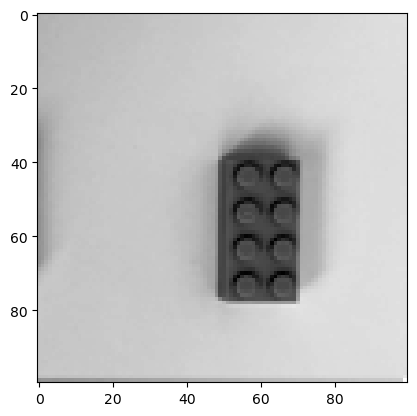

In [35]:
i_check = random.randrange(n_classes)
j_check = random.randrange(P_per_class[i_check])
res_check = 100

x_check, y_check = get_data(folder_training[i_check], res_check, i_check, P_per_class[i_check])
plt.imshow(x_check[j_check,:].reshape(res_check,res_check), cmap = 'gray')
plt.show()

### 3. Model Training

In [48]:
# Logistic Regression Modelling
# we limit the iteration number to 1500 to avoid the system raise warnings in the output
# y_train has an added parameter (i.e. .ravel()) to also avoid the same thing above

model = LogisticRegression(max_iter = 1500)
model.fit(x_train,y_train.ravel())

LogisticRegression(max_iter=1500)

### 4. Accuracy Test on Old Model

Define a function "test_function":

In [37]:
def test_function(path):

    # store array of directories to each image sorted to their defined classes in the path
    folder_path = []

    for i in range(len(class_type)):

        class_temp = []

        for j in os.listdir(path):
            if class_type[i] in j:
                class_temp.append(j)
                
        folder_path.append(class_temp)

    for i in range(len(folder_path)):
        for j in range(len(folder_path[i])):
            folder_elem = folder_path[i][j]
            folder_path[i][j] = path + folder_elem

    # prepare data for testing
    P_per_class = [len(folder_path[i]) for i in range(n_classes)]
    x_test = np.empty((sum(P_per_class), im_width**2))
    y_test = np.empty((sum(P_per_class), 1))

    for i in range(n_classes):
        x_i, y_i = get_data(folder_path[i], im_width, i, P_per_class[i])
        x_test[i*P_per_class[i]:(i+1)*P_per_class[i],:] = x_i
        y_test[i*P_per_class[i]:(i+1)*P_per_class[i],:] = y_i

    # test model
    y_pred = model.predict(x_test)
    print(f"Confusion matrix: \n{confusion_matrix(y_test,y_pred)}")
    print(f"Accuracy score: {accuracy_score(y_test,y_pred):.3f}")

Test accuracy on new dataset:</br>
As seen below, with the old model (with only 64 features maximum), we are only able to achieve 50% accuracy.

In [43]:
path = testing_path
test_function(path)

Confusion matrix: 
[[11 12  3  1]
 [ 4 15  6  2]
 [ 2  1 22  2]
 [ 2  9  5 11]]
Accuracy score: 0.546
